In [11]:
import fitsio
%matplotlib inline
import sys
sys.path.append('/Users/vipasu/Dropbox/Research/addgals/code_for_addgals')
from routines import * 


In [2]:
#data_dir = '/nfs/slac/g/ki/ki23/des/vipasu/addgals/'
data_dir = '../'
#__builtin__.image_prefix = data_dir + "Images/dist + mvir thresh/"
__builtin__.image_prefix = data_dir + "plots/"

mkdir_p(image_prefix)

In [3]:
##################################################
# read data
d0 = fits_to_pandas(fitsio.read(data_dir + 'Becker_CAM_mock.fits', lower=True))
box_size = 250.0    
np.random.seed(111)


In [4]:
mass, smin, smax, Mv_cut, nn =  5e12, 9.0, 13.0, 1e13, 1
name = "mv cut {}; {} < M* < {}".format(Mv_cut, smin, smax)
d, dp = catalog_selection(d0, Mv_cut, smin, smax)
#dist, mvir, _ = get_dist_mass_vmax(dp,d, nn, Mv_cut)
dist, res = get_dist_and_attrs(dp, d, nn, ['mvir', 'vmax'])
mvir, vmax = res
d['host_mvir'] = mvir
d['host_vmax'] = vmax
d['host_dist'] = dist
print "Number of data points", len(d)
rhill= np.array(calculate_r_hill(d, dp))
d['rhill'] = np.log10(rhill)
d_train, d_test = split_octant(d, box_size)

0 207054
10000 207054
20000 207054
30000 207054
40000 207054
50000 207054
60000 207054
70000 207054
80000 207054
90000 207054
100000 207054
110000 207054
120000 207054
130000 207054
140000 207054
150000 207054
160000 207054
170000 207054
180000 207054
190000 207054
200000 207054
Number of data points 207054
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000


In [12]:
features = ['host_dist']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-13.0022602081 -8.60770988464


[-2.3979279159240803, 12.715696136482656]


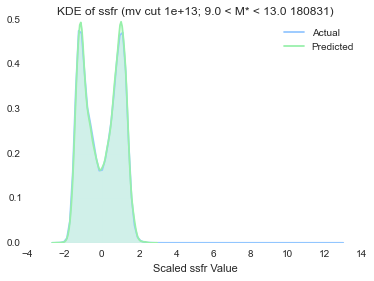

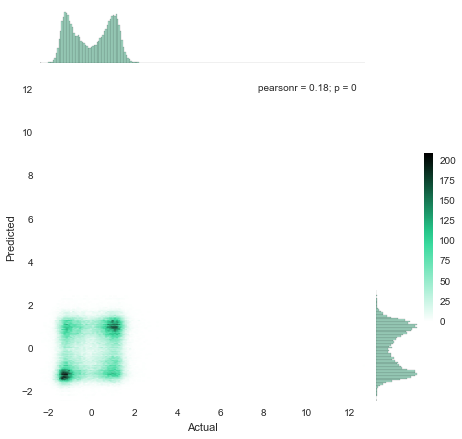

In [47]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

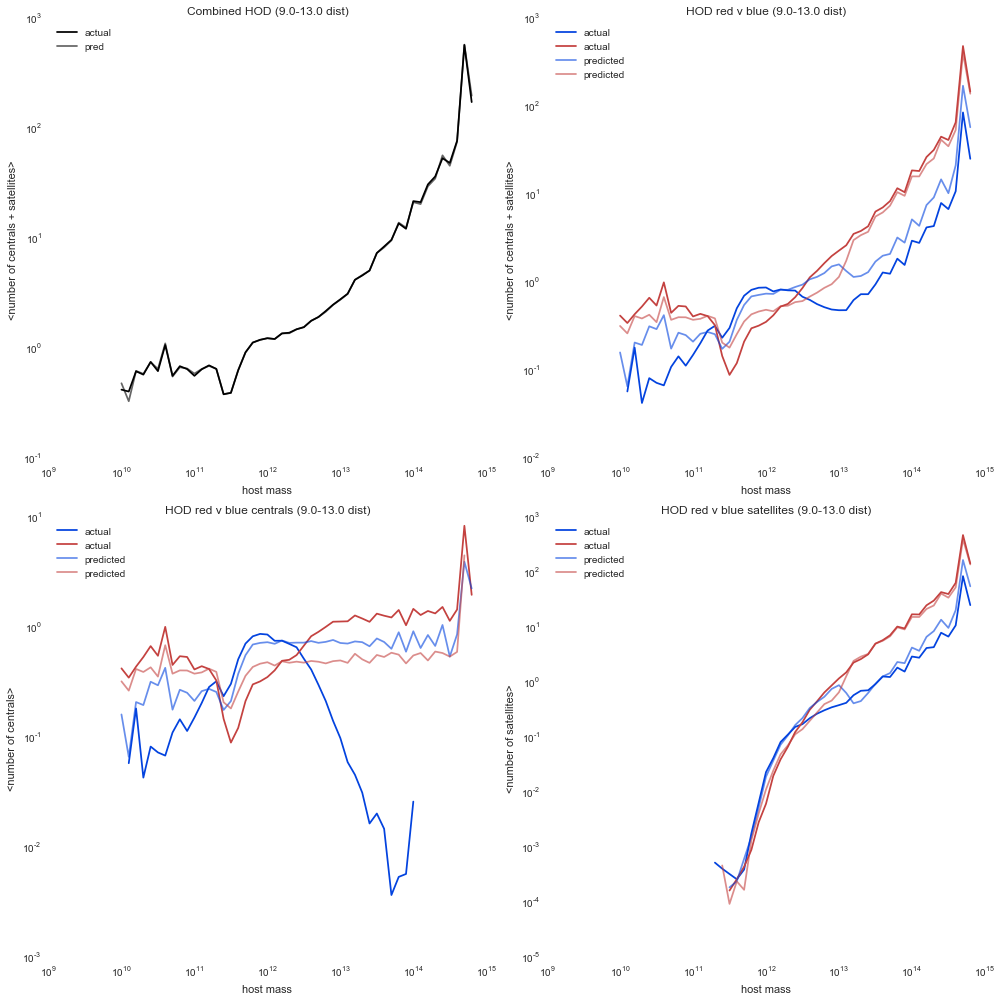

In [48]:
plot_HOD(d0, d_test, '9.0-13.0 dist', 9.0, 13.0)

Chi square is:  (14.976020394704687, 0.99997805405901985)


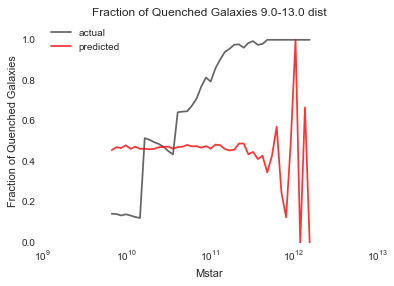

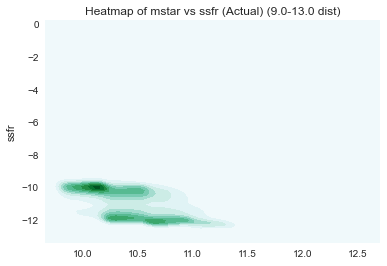

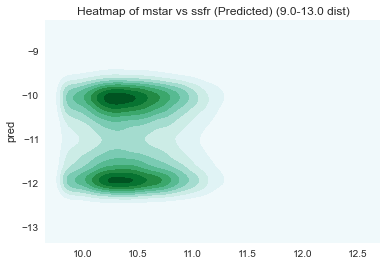

In [49]:
plot_p_red(10**d_test['mstar'].values, d_test['ssfr'], d_test['pred'], '9.0-13.0 dist')

0th bin
chi square is: (621.24295296153537, 1.6526127245816282e-119)
1th bin
chi square is: (243.38027876656159, 6.7587415341818923e-41)


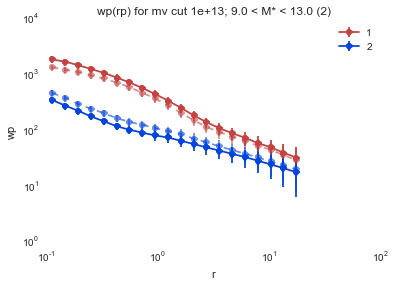

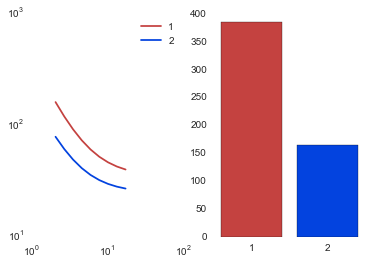

0th bin
chi square is: (1663.7770422005508, 0.0)
1th bin
chi square is: (104.63037449000917, 7.7038252780132347e-14)
2th bin
chi square is: (237.51612470735162, 1.0327784399979237e-39)


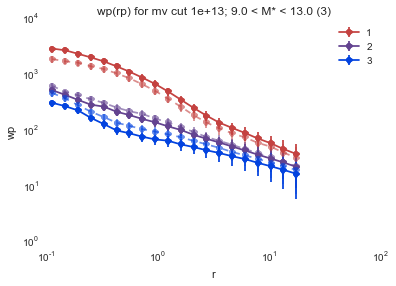

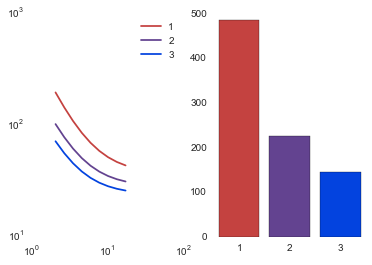

0th bin
chi square is: (2923.2214032996726, 0.0)
1th bin
chi square is: (26.227360205837524, 0.12397748752361105)
2th bin
chi square is: (198.46455975695363, 6.8763667261440922e-32)
3th bin
chi square is: (193.58415669392787, 6.4005310217026265e-31)


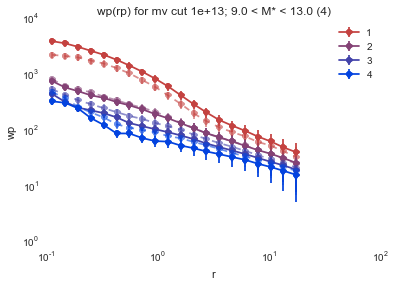

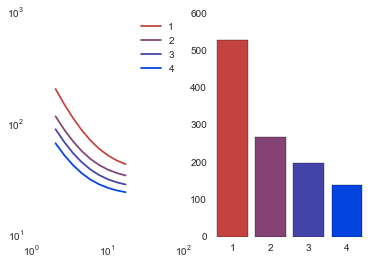

0th bin
chi square is: (4360.4225429475446, 0.0)
1th bin
chi square is: (38.348483883225356, 0.0053572007503781749)
2th bin
chi square is: (138.86921942239221, 3.0024034825862549e-20)
3th bin
chi square is: (216.47831920391997, 1.7504122398281336e-35)
4th bin
chi square is: (237.64978061926192, 9.7060469924712192e-40)


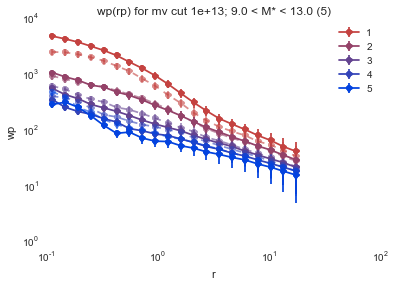

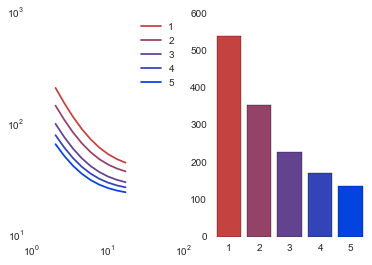

In [13]:
N_splits = 5
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

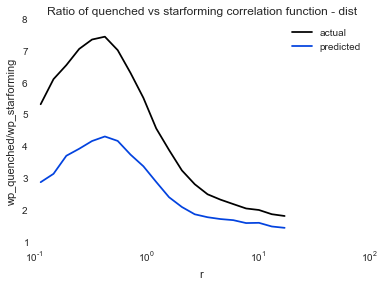

In [51]:
correlation_ratio(d_test, name + 'dist')


(-13, -8)

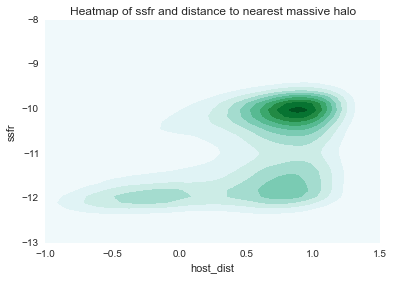

In [52]:
sns.kdeplot(d_test['host_dist'], d_test['ssfr'], shade=True)
plt.title('Heatmap of ssfr and distance to nearest massive halo')
plt.xlim(-1,1.5)
plt.ylim(-13, -8)

(-13, -8)

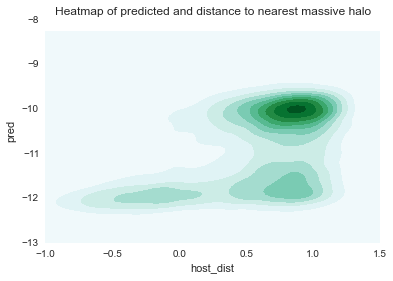

In [53]:
sns.kdeplot(d_test['host_dist'], d_test['pred'], shade=True)
plt.title('Heatmap of predicted and distance to nearest massive halo')
plt.xlim(-1,1.5)
plt.ylim(-13, -8)

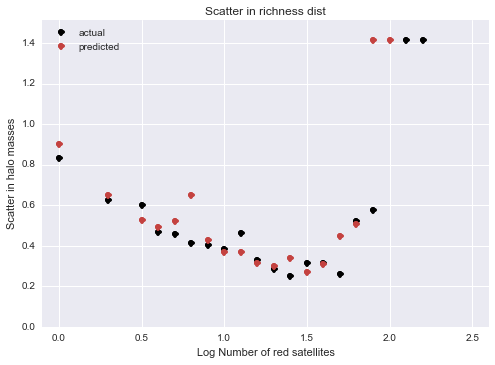

In [6]:
plot_richness_scatter(d_test, 'dist', d0)
#richness_scatter(d_test[d_test['ssfr'] < -11.0])

In [55]:
subs = d_test[d_test['upid'] != -1]
subs.groupby('upid').count().values.T[0].flatten()

array([2, 2, 1, ..., 1, 1, 1])

In [56]:
#plot_density_profile(d0, d, d_test, '10.1-10.5 all')

In [57]:
#plot_density_profile(d0, d_test, d_test, '10.1-12.0')

In [7]:
features = ['host_mvir']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-12.3509902954 -9.61044025421


[-2.3979279159240803, 12.715696136482656]


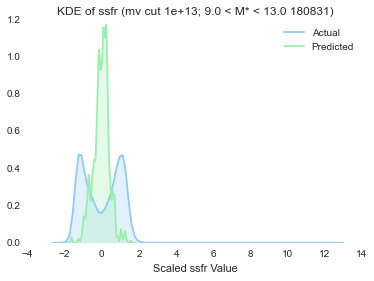

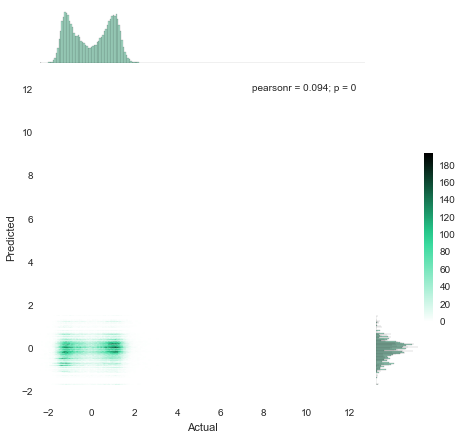

In [59]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

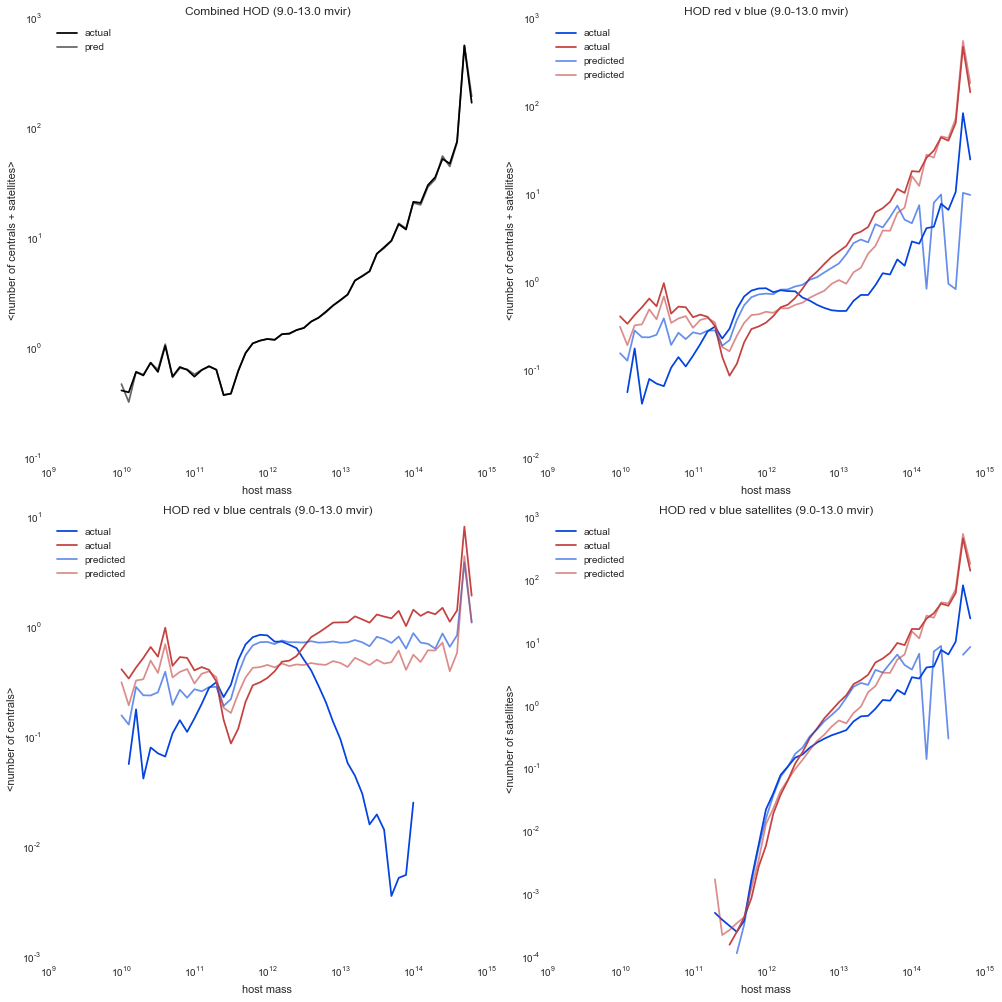

In [60]:
plot_HOD(d0, d_test, '9.0-13.0 mvir', 9, 13.0)

Chi square is:  (11.609578303535786, 0.99999955246378958)


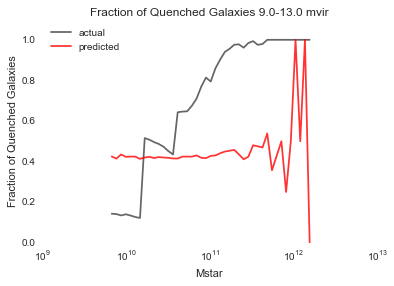

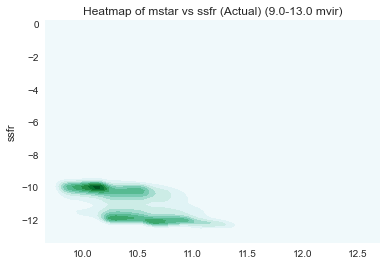

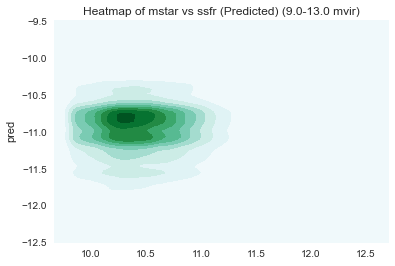

In [61]:
plot_p_red(10**d_test['mstar'].values, d_test['ssfr'], d_test['pred'], '9.0-13.0 mvir')

0th bin
chi square is: (370.6225234785274, 5.51022331230559e-67)
1th bin
chi square is: (11647.527696158482, 0.0)


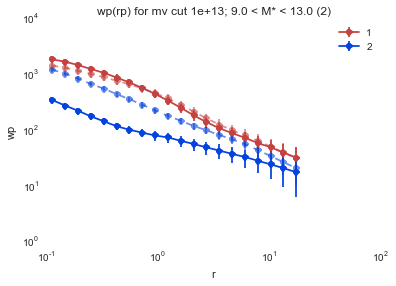

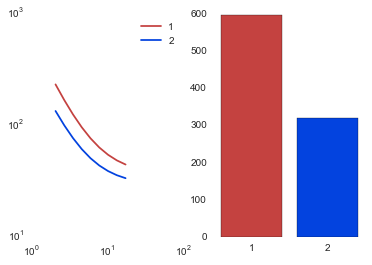

0th bin
chi square is: (1433056.0219238603, 0.0)
1th bin
chi square is: (855.87210407130669, 2.8088831502157737e-169)
2th bin
chi square is: (10726908.612203507, 0.0)


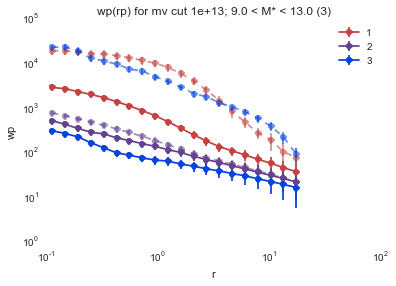

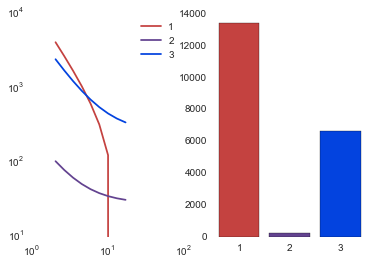

0th bin
chi square is: (3416552.4366318169, 0.0)
1th bin
chi square is: (7452.8626651443738, 0.0)
2th bin
chi square is: (8133.2893140180777, 0.0)
3th bin
chi square is: (15079183.746421842, 0.0)


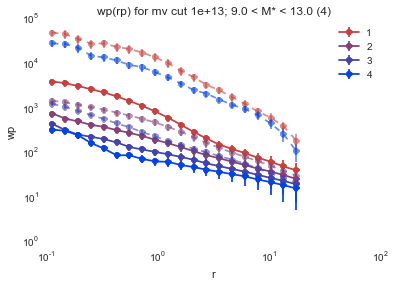

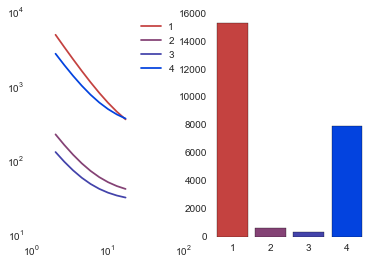

0th bin
chi square is: (4534323.677020357, 0.0)
1th bin
chi square is: (519925.61110870959, 0.0)
2th bin
chi square is: (1019.6760415755466, 3.3420175110544523e-204)
3th bin
chi square is: (1154109.417616873, 0.0)
4th bin
chi square is: (18577521.829039473, 0.0)


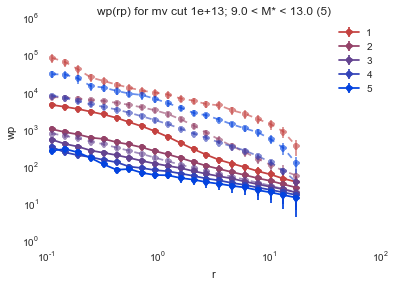

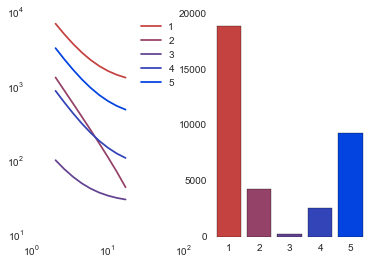

In [62]:
N_splits = 5
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

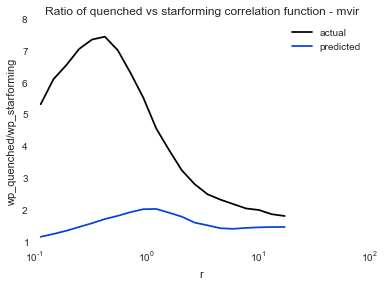

In [63]:
correlation_ratio(d_test, name + 'mvir')


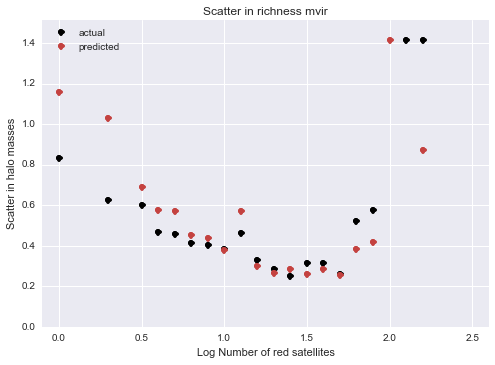

In [8]:
plot_richness_scatter(d_test, 'mvir', d0)

In [65]:
#plot_density_profile(d0, d, d_test, '10.1-10.5 all')

In [14]:
features = ['rhill']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-13.0022602081 -8.60770988464


[-2.3979279159240803, 12.715696136482656]


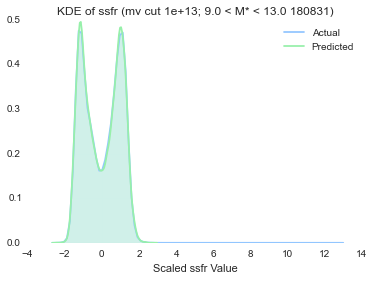

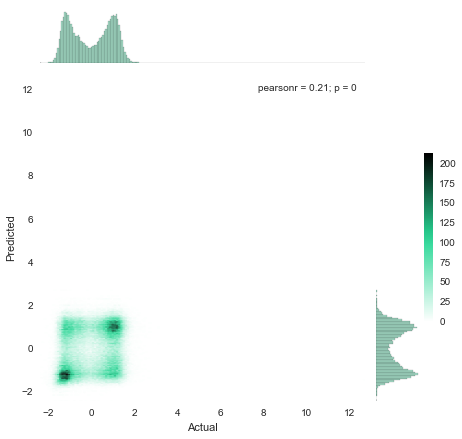

In [67]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

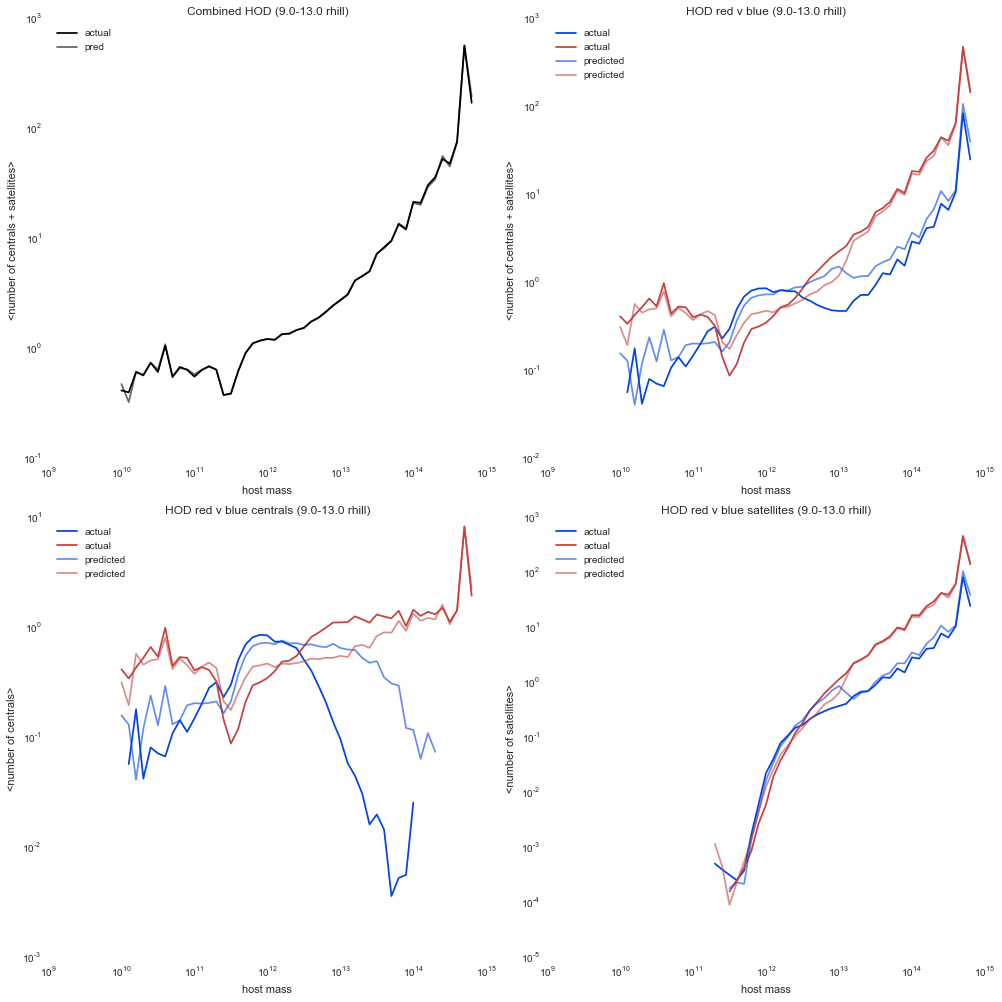

In [68]:
plot_HOD(d0, d_test, '9.0-13.0 rhill', 9.0, 13.0)

Chi square is:  (7.7904546999295325, 0.99999999948776497)


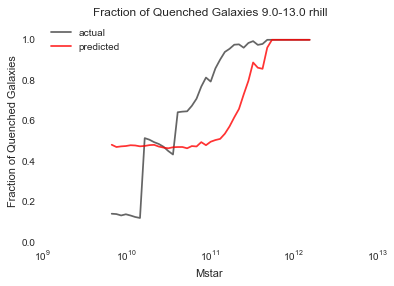

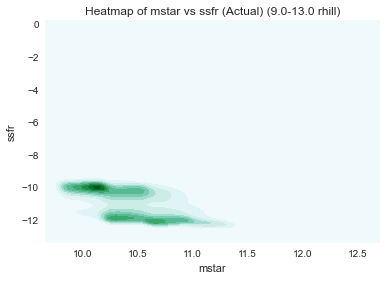

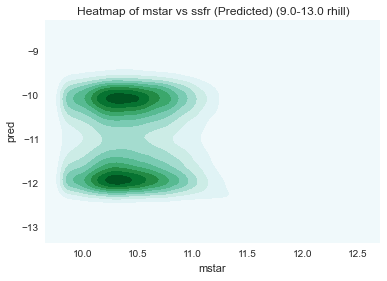

In [69]:
plot_p_red(10**d_test['mstar'], d_test['ssfr'], d_test['pred'], '9.0-13.0 rhill')

0th bin
chi square is: (380.78545761091402, 4.3015824311930861e-69)
1th bin
chi square is: (149.7918644781661, 2.4038037627833534e-22)


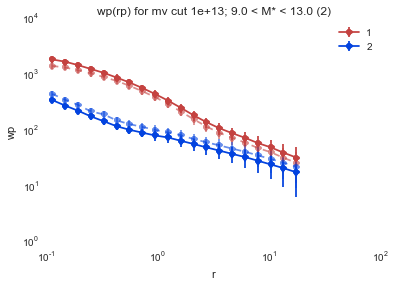

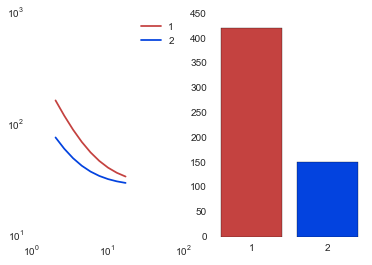

0th bin
chi square is: (934.02488609389843, 6.3053861703783996e-186)
1th bin
chi square is: (38.158850703299095, 0.0056645312371796921)
2th bin
chi square is: (130.65463379699486, 1.096072118534855e-18)


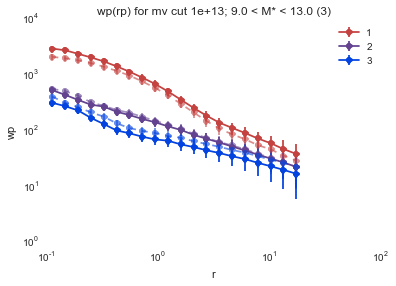

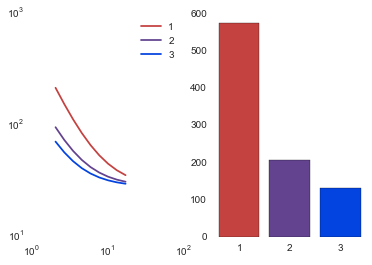

0th bin
chi square is: (1579.5333082430996, 0.0)
1th bin
chi square is: (34.304457069435465, 0.016914719335201556)
2th bin
chi square is: (85.782316598114818, 1.8370958498722884e-10)
3th bin
chi square is: (110.48895457026252, 6.477715288649571e-15)


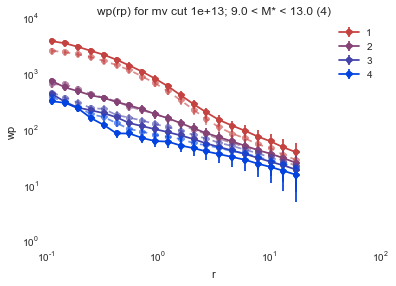

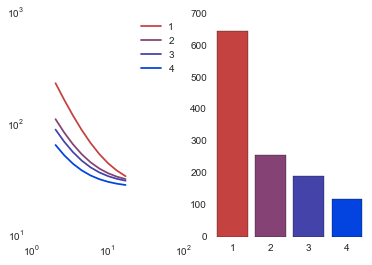

0th bin
chi square is: (2546.1339637789138, 0.0)
1th bin
chi square is: (52.254313189399852, 6.0604176582598781e-05)
2th bin
chi square is: (31.937505461473521, 0.031764828364957143)
3th bin
chi square is: (165.78278147636462, 1.8957575325877492e-25)
4th bin
chi square is: (126.9444819535191, 5.5077480059320915e-18)


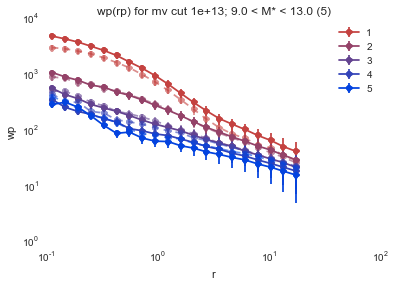

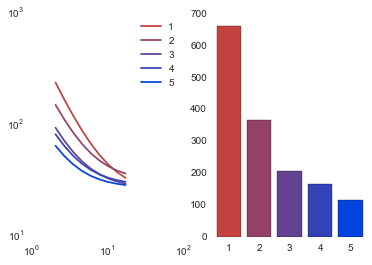

In [15]:
N_splits = 5
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

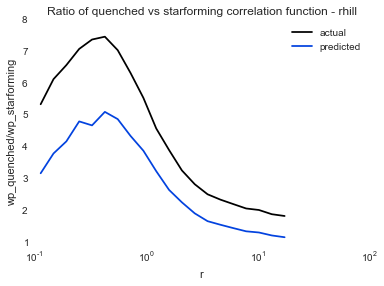

In [71]:
correlation_ratio(d_test, name + 'rhill')


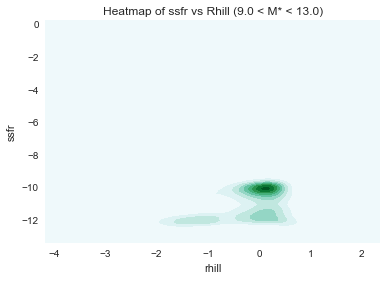

In [72]:
sns.kdeplot(d_test['rhill'], d_test['pred'], shade=True)
plt.title('Heatmap of predicted vs Rhill (9.0 < M* < 13.0)')
sns.kdeplot(d_test['rhill'], d_test['ssfr'], shade=True)
plt.title('Heatmap of ssfr vs Rhill (9.0 < M* < 13.0)')

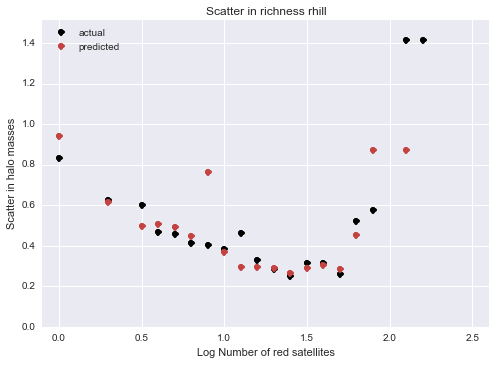

In [10]:
#Scatter
plot_richness_scatter(d_test, 'rhill', d0)


### Fifth Nearest

In [11]:
mass, smin, smax, Mv_cut, nn =  5e12, 9.0, 13.0, 1e13, 5
name = "mv cut {}; {} < M* < {}".format(Mv_cut, smin, smax)
d, dp = catalog_selection(d0, Mv_cut, smin, smax)
#dist, mvir, _ = get_dist_mass_vmax(dp,d, nn, Mv_cut)
dist, res = get_dist_and_attrs(dp, d, nn, ['mvir', 'vmax'])
mvir, vmax = res
#d['host_mvir'] = mvir
#d['host_vmax'] = vmax
d['5th_dist'] = dist
print "Number of data points", len(d)
#rhill= np.array(calculate_r_hill(d, dp))
#d['rhill'] = np.log10(rhill)
#d['log rhill'] = np.log10(rhill)
d_train, d_test = split_octant(d, box_size)

0 207054
10000 207054
20000 207054
30000 207054
40000 207054
50000 207054
60000 207054
70000 207054
80000 207054
90000 207054
100000 207054
110000 207054
120000 207054
130000 207054
140000 207054
150000 207054
160000 207054
170000 207054
180000 207054
190000 207054
200000 207054
Number of data points 207054


In [26]:
features = ['5th_dist']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor(min_samples_leaf=20)
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

KeyError: '5th_dist'

[-2.3979279159240803, 12.715696136482656]


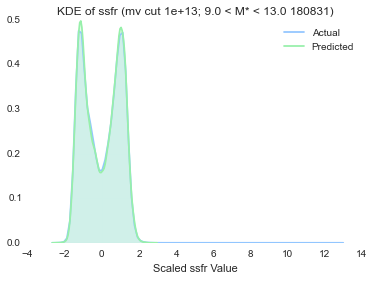

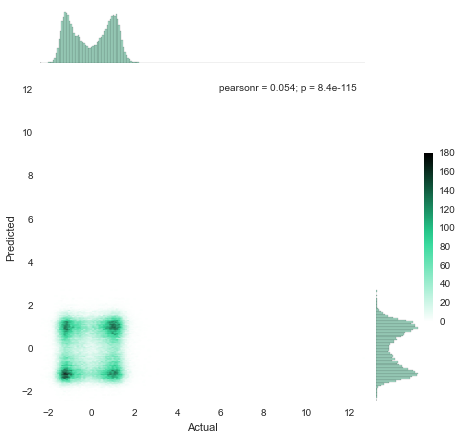

In [76]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

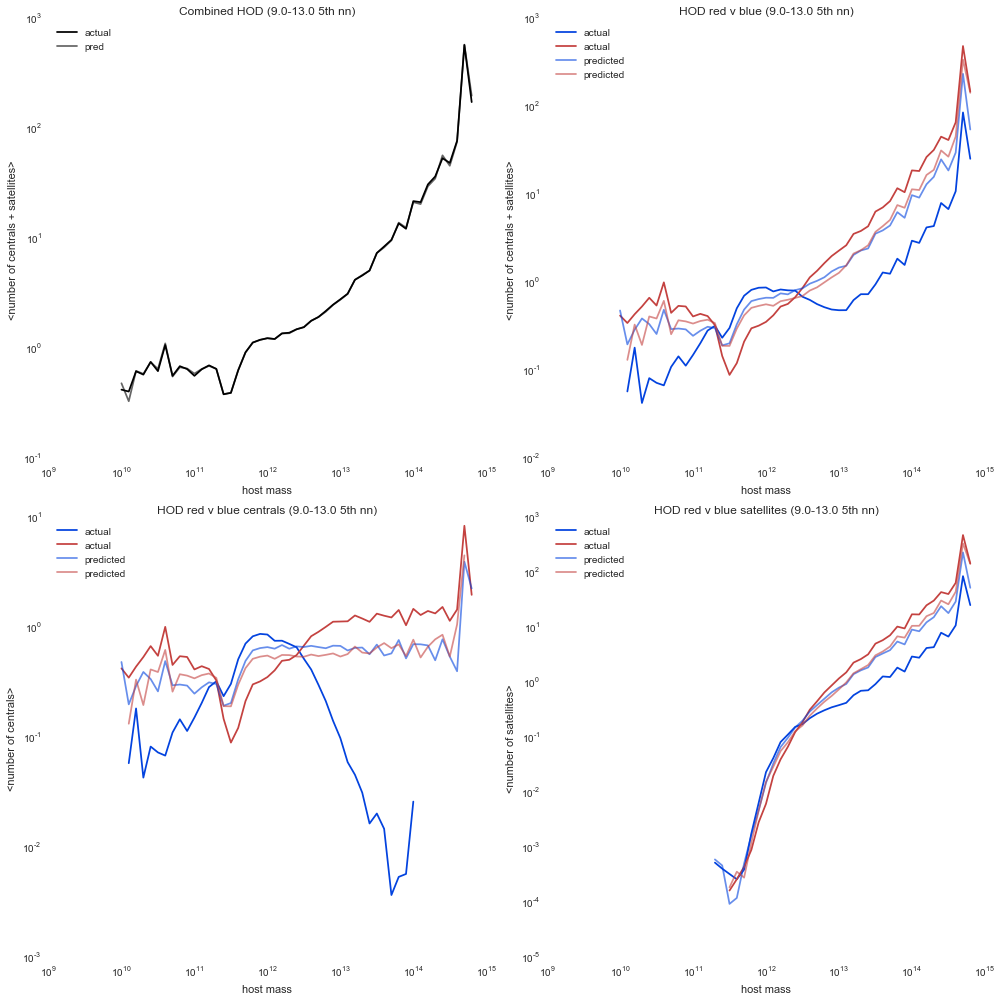

In [77]:
plot_HOD(d0, d_test, '9.0-13.0 5th nn', 9.0, 13.0)

Chi square is:  (12.273670234058057, 0.99999891753186976)


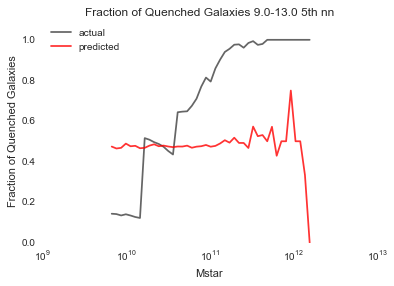

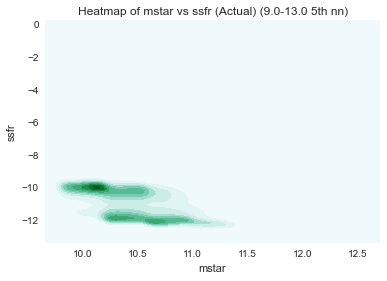

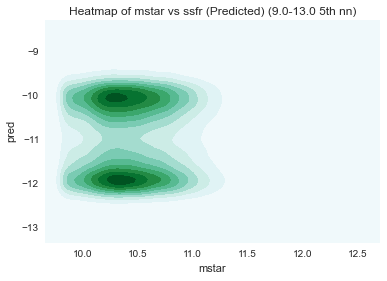

In [78]:
plot_p_red(10**d_test['mstar'], d_test['ssfr'], d_test['pred'], '9.0-13.0 5th nn')

In [ ]:
N_splits = 5
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

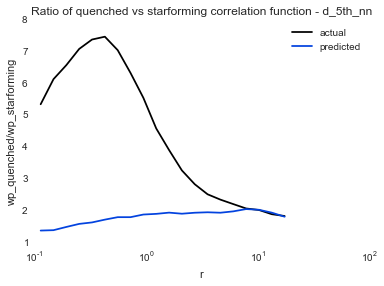

In [80]:
correlation_ratio(d_test, name + 'd_5th_nn')


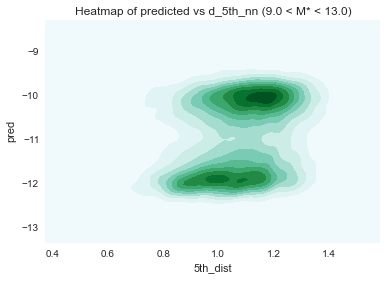

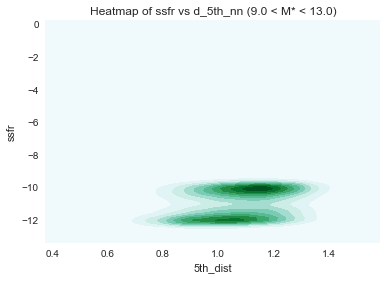

In [81]:
sns.kdeplot(d_test['5th_dist'], d_test['pred'], shade=True)
plt.title('Heatmap of predicted vs d_5th_nn (9.0 < M* < 13.0)')
plt.figure()
sns.kdeplot(d_test['5th_dist'], d_test['ssfr'], shade=True)
plt.title('Heatmap of ssfr vs d_5th_nn (9.0 < M* < 13.0)')

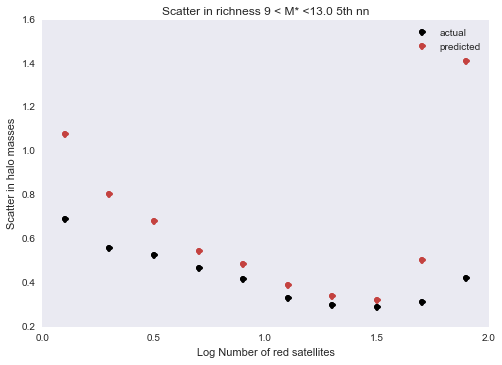

In [13]:
plot_richness_scatter(d_test, '9 < M* <13.0 5th nn')

#finer bins

In [ ]:
mass, smin, smax, Mv_cut, nn =  5e12, 11.0, 12.0, 1e13, 1
name = "mv cut {}; {} < M* < {}".format(Mv_cut, smin, smax)
d, dp = catalog_selection(d0, Mv_cut, smin, smax)
#dist, mvir, _ = get_dist_mass_vmax(dp,d, nn, Mv_cut)
dist, res = get_dist_and_attrs(dp, d, nn, ['mvir', 'vmax'])
mvir, vmax = res
d['host_mvir'] = mvir
d['host_vmax'] = vmax
d['host_dist'] = dist
print "Number of data points", len(d)
rhill= np.array(calculate_r_hill(d, dp))
d['rhill'] = rhill
d_train, d_test = split_octant(d, box_size)

In [ ]:
features = ['rhill']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

In [ ]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

In [ ]:
plot_HOD(d0, d_test, '11.0-12.0 rhill', 11.0, 12.0)

In [ ]:
plot_p_red(10**d_test['mstar'], d_test['ssfr'], d_test['pred'], '11.0-12.0 rhill')

In [ ]:
N_splits = 10
for i in xrange(1, N_splits):
    wprp_comparison(d_test, name + " (" + str(i + 1) + ")", i)

In [ ]:
sns.kdeplot(d_test['log rhill'], d_test['ssfr'], shade=True)

In [ ]:
plot_richness_scatter(d_test, '9 < M* <13.0 5th nn')

In [18]:
model.predict([.5])

array([-1.15911663])

In [19]:
model.predict([.5])

array([-1.15911663])

In [20]:
model.predict([.49])

array([-0.17103183])

In [21]:
model.predict([.4999])

array([ 1.25326083])

In [22]:
model.predict([.4999])

array([ 1.25326083])

In [24]:
model.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}